# Pandas Revisited

By the end of this lecture, students should feel comfortable with:
* Loading data into pandas
* Summarizing data by column or by aggregate group
* Handling missing values
* Selecting portions of data by index or with a mask
* Manipulating data in pandas by applying functions, creating columns, etc.

In [ ]:
import pandas as pd

## Loading Data

Let's take a look at some data and see how pandas can help us navigate.  

This dataset about cereal lives on [Kaggle](https://www.kaggle.com/crawford/80-cereals) and originally comes from [these project datasets](https://perso.telecom-paristech.fr/eagan/class/igr204/datasets).  

In [ ]:
df = pd.read_csv('https://bit.ly/2JRmGC2')

In [ ]:
df.info()

In [ ]:
df.describe()
# df.describe().round()

In [ ]:
df.head()

From `.info()` it looks like we don't have any null values in this dataset.  But check out the final row for Almond Delight.  It looks like the authors of this dataset have used -1 to signify missing values.  We could convert this now, or we could use arguments of `.read_csv()` to help us out.  Let's also set the cereal name to be the index of our dataframe.

In [ ]:
df = pd.read_csv('https://bit.ly/2JRmGC2', 
                 na_values = -1,
                 index_col = 0
                )

In [ ]:
df.head()

`.read_csv()` has a ton of built in parameters to help you correctly format your data as you load it into pandas.  For example, you can:

- set how your data is separated with `sep` (e.g. ',' for commas or '\t' for tabs)
- only load a portion of your data with `nrows`
- convert numbers like 2,000 to integers with `thousands`

To see all available options for any object or function in Jupyter, use the question mark.

In [ ]:
pd.read_csv?

The result of `.read_csv()` is a dataframe, the main data structure of pandas.  Dataframes are made up of columns and rows, each of which are pandas series.

In [ ]:
type(df)

Note that the calories column can be referred to with either 
- square brackets  
- dot methodology

This is true only if the column name is a valid Python variable; column names with spaces or other special characters can only be refered to using square brackets.

In [ ]:
type(df['calories'])   #calories column

In [ ]:
type(df.calories)      #also the calories column


We can access rows of dataframes with `.loc` and the row index.

In [ ]:
type(df.loc['100% Bran'])   #100% Bran row

In [ ]:
df.loc['100% Bran']

We can also access rows of dataframes with `iloc` and the integer location of the index

In [ ]:
df.iloc[0]

## Exploring Data

After getting a quick look at your data with `.head()` and `.info()`, you will also want to explore individual columns.

In [ ]:
df.calories.describe()

In [ ]:
df.sugars.mean()

In [ ]:
df.mfr.value_counts()

The result of `.value_counts()` is itself a series with the column's categorical values as its index!

In [ ]:
vc = df.mfr.value_counts()

type(vc)

In [ ]:
vc.loc['K']

## Filtering Data

Often times you will want to explore select portions of your data.  You can create and apply masks to filter your data.

In [ ]:
mask = (df.calories > 100)

The mask you just created is really just logical `True` and `False` values for each row, telling you if the condition holds for that observation.

In [ ]:
mask

When you apply the mask only rows with `True` values are kept.

In [ ]:
df[mask].head(10)

This more direct approach also works.

In [ ]:
df[df.calories > 100].head(10)

To filter on multiple columns or on multiple values, just continue chaining together logical statements with logical operators: and (`&`), or (`|`).

In [ ]:
mask = (df.calories > 100) & (df.sugars < 8) & ((df.mfr == 'K') | (df.mfr == 'G'))

In [ ]:
df[mask]

## Handling Missings

There are only four missing values in this whole dataset, but let's review how we could handle those.

In [ ]:
df.isna().head()

In [ ]:
df.isna().sum()  #or .sum(axis=1) to sum across rows

For the purpose of practicing two different techniques, let's:
- drop rows that have missing carbohydrate or sugar values
- fill in the missing potassium values with the median

In [ ]:
df.shape

In [ ]:
df.dropna(subset=['carbo','sugars']).head()

In [ ]:
df.dropna(subset=['carbo','sugars']).shape

In [ ]:
df.shape  #oops!

Remember to add `inplace=True` if you want to change the underlying dataframe!

In [ ]:
df.dropna(subset=['carbo', 'sugars'], inplace=True)

In [ ]:
df.shape

Now for filling in the potassium values.

In [ ]:
potass_median = df.potass.median()

potass_median

In [ ]:
df.potass.fillna(potass_median, inplace=True)

In [ ]:
df.head()

## Applying Functions to Data

Our current data about each cereal's vitamin content only contains three distinct values.

In [ ]:
df.vitamins.value_counts()

Let's create a new column in the dataframe to tell us whether or not each cereal contains at least a vitamin level of at least 25.

In [ ]:
df['vitamin_at_least_25'] = df.vitamins >= 25

In [ ]:
df.head()

### .apply()

What if we want to classify each cereal as having a "low", "medium", or "high" level of vitamins?  Well, it would be pretty easy to create a function to do this if we just have one value.

> **HINT** <font color='grey'> An "elif" condition is only tested if the previous "if" test was false. When you use another "if" instead of "elif", then the second condition will always be tested, no matter what the result of the first one was.

In [ ]:
def get_vitamin_level(vitamins):
    if vitamins > 99:
        return 'high'
    elif vitamins > 24:
        return 'medium'
    else:
        return 'low'

In [ ]:
get_vitamin_level(100)

In [ ]:
get_vitamin_level(25)

Now we will use `.apply()` to apply this function to every value in the vitamin column.

In [ ]:
df.vitamins.apply(get_vitamin_level)

In [ ]:
df['vitamin_level'] = df.vitamins.apply(get_vitamin_level)

In [ ]:
df.head()

You can also use lambda functions within the `.apply()`

In [ ]:
df['vitamin_perc'] = df.vitamins.apply(lambda x: str(x)+'%')

In [ ]:
df.head()

### .map()

`.apply()` is a very helpful function and so is `.map()`.  Let's say we want to convert the currently encoded manufacturer column into the actual names of the manufacturers and we have this dictionary to help us.

In [ ]:
mfr_dict = {
    'A': 'Am Home Food Prods',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

All we need to do is map this dictionary onto our current manufacturer column.

In [ ]:
df.mfr.map(mfr_dict)

In [ ]:
df['manufacturer'] = df.mfr.map(mfr_dict)

In [ ]:
df.head()

Note that the information currently in your dataframe should be the keys for the mapping dictionary; the dictionary's values will be returned in the new column.

The differences between `.apply()`, `.map()`, and `.applymap()` can be subtle.  Check out [this reference](https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/) for further reading & this [additional reference](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff)

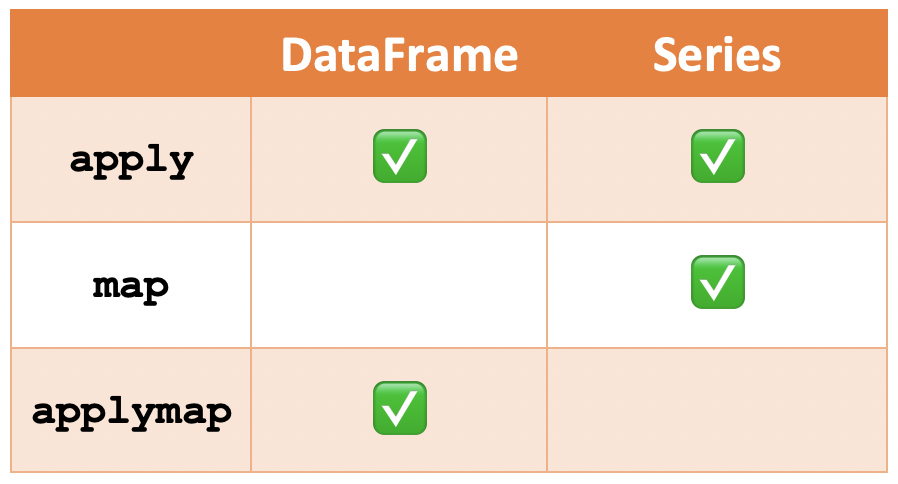

## Grouping and Aggregating Data

Finally, let's refresh the concept of grouping data within pandas.

What is the median calories per serving of cereal for each manufacturer?

In [ ]:
df.groupby('manufacturer').calories.median()

In [ ]:
df.groupby('manufacturer').calories.median().sort_values(ascending=False)

We can group by multiple attributes by passing a list of columns to the `.groupby()`.

In [ ]:
df.groupby(['manufacturer', 'type'])[['calories']].median()

Grouping by multiple columns results in a multi-level index.  You can reset your index if you'd prefer these to be columns.

In [ ]:
df.groupby(['manufacturer', 'type'])[['calories']].median().reset_index()

You can perform aggregations on multiple columns.

In [ ]:
df.groupby('manufacturer')[['calories', 'sugars']].median()

You can also do multiple aggregrations at once by using `.agg()` and passing a list of aggregations.

In [ ]:
df.groupby('manufacturer').calories.agg(['mean', 'std', 'median', 'count'])

Finally, to apply different aggregation functions to the columns, pass a dictionary to `.agg()`.

In [ ]:
(df
 .groupby('manufacturer')[['mfr','calories', 'sugars', 'rating']]
 .agg({
     'mfr': 'count',
     'calories': 'median',
     'sugars': 'mean',
     'rating': 'mean'
 })
)